In [28]:
pip install vtki

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement vtki (from versions: none)
ERROR: No matching distribution found for vtki
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import all the necessary libraries
import vtk
import numpy as np
from vtk.util.numpy_support import vtk_to_numpy
import math
import pyevtk
from matplotlib import pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import pyvista as pv
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from enthought.tvtk.api import tvtk, write_data
from scipy.interpolate import griddata
from pyevtk.hl import gridToVTK
import random

In [2]:
#Load the dataset
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName("Isabel_Pressure_25.vti")
reader.Update()
imageData = reader.GetOutput() #read data


In [3]:
#Convert the data into numpy array format
temp = vtk_to_numpy(imageData.GetPointData().GetScalars())
dims = imageData.GetDimensions()
dat = temp.reshape(dims[2], dims[1], dims[0])
dat = dat.transpose(2,1,0)
original_data=dat

 #dimensions of the data
dat.shape

(250, 250, 50)

In [ ]:
import numpy as np
import vtk
from vtk.util.numpy_support import numpy_to_vtk

# Generate example 3D volume data (replace this with your actual data)

# Specify the percentage of data you want to sample (e.g., 5%)
sampling_percentage = 5

# Calculate the number of sampled points
num_sampled_points = int(np.prod(original_data.shape) * sampling_percentage / 100)

# Randomly select sampled points
sampled_coordinates = np.column_stack([
    np.random.randint(0, original_data.shape[0], num_sampled_points),
    np.random.randint(0, original_data.shape[1], num_sampled_points),
    np.random.randint(0, original_data.shape[2], num_sampled_points)
])

# Extract the values at the sampled coordinates
sampled_values = original_data[sampled_coordinates[:, 0], sampled_coordinates[:, 1], sampled_coordinates[:, 2]]

# Create VTK Structured Grid
structured_grid = vtk.vtkStructuredGrid()
structured_grid.SetDimensions(original_data.shape)

# Create vtkPoints and set the coordinates
points = vtk.vtkPoints()
points.SetData(numpy_to_vtk(sampled_coordinates.astype(np.float32)))
structured_grid.SetPoints(points)

# Convert the data type of the sampled_values to float32
sampled_values = sampled_values.astype(np.float32)

# Create a vtkFloatArray for the sampled values
values_array = vtk.vtkFloatArray()
values_array.SetNumberOfValues(num_sampled_points)
values_array.SetArray(sampled_values, num_sampled_points, 1)

# Add the values array to the point data of the grid
structured_grid.GetPointData().SetScalars(values_array)

# Write the structured grid to a VTS file
writer = vtk.vtkXMLStructuredGridWriter()
writer.SetFileName('sampled_data.vts')
writer.SetInputData(structured_grid)
writer.Write()


In [15]:
 # Replace with your actual data

# Define the percentage of data you have (e.g., 5%)
    
original_data=dat
data_percentage =  5/100

# Calculate the number of known data points
num_known_points = int(np.prod(original_data.shape) * data_percentage)
#print(num_known_points)
# Randomly select known data points
known_coordinates = np.column_stack([np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 50, num_known_points)])
# Extract the values at the known coordinates
known_values = original_data[known_coordinates[:, 0], known_coordinates[:, 1], known_coordinates[:, 2]]
#print(known_values.shape())
# Create a grid of coordinates for the entire 3D space
x = np.arange(original_data.shape[0])
y = np.arange(original_data.shape[1])
z = np.arange(original_data.shape[2])
# Define the grid of coordinates for the entire 3D space
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
print(np.max(known_coordinates))
# Create an array of coordinates for the entire grid
reconstructed_data = griddata(known_coordinates, known_values,(grid_x, grid_y, grid_z), method='nearest')
# # Plot the reconstructed 3D surface
gridToVTK("100%_reconstructed", x=np.array(range(reconstructed_data.shape[0])), y=np.array(range(reconstructed_data.shape[1])), z=np.array(range(reconstructed_data.shape[2])), cellData={'data': reconstructed_data})
# #ax.add_collection3d(mesh)
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# #plt.show()

# You can visualize the reconstructed data using a library like Matplotlib or a 3D visualization library.
# Create a 3D figure
# fig = plt.figure(figsize=(12, 6))
# # # Subplot for original data
# ax1 = fig.add_subplot(121, projection='3d')
# x, y, z = np.meshgrid(np.arange(original_data.shape[0]), np.arange(original_data.shape[1]), np.arange(original_data.shape[2]), indexing='ij')
# ax1.scatter(x, y, z, c=original_data, marker='o',alpha=0.01)
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Y-axis')
# ax1.set_zlabel('Z-axis')
# ax1.set_title('Original 3D Data')
# # Subplot for reconstructed data
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.scatter(x,y,z, c=reconstructed_data, marker='o',alpha=0.01)
# ax2.set_xlabel('X-axis')
# ax2.set_ylabel('Y-axis')
# ax2.set_zlabel('Z-axis')
# ax2.set_title('Reconstructed 3D Data')
# # Display the plot
# plt.show()

249


'/home/aashi/Desktop/CS677_project/100%_reconstructed.vtr'

In [1]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from pyevtk.hl import gridToVTK

# Generate example 3D data (you should replace this with your actual data)
    
original_data=dat
data_percentage =  5/100

# Calculate the number of known data points
num_known_points = int(np.prod(original_data.shape) * data_percentage)

# Randomly select known data points
known_coordinates = np.column_stack([np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 250, num_known_points),
                                     np.random.randint(0, 50, num_known_points)])
print(known_coordinates)
# Extract the values at the known coordinates
known_values = original_data[known_coordinates[:, 0], known_coordinates[:, 1], known_coordinates[:, 2]]

# Create a grid of coordinates for the entire 3D space
x = np.arange(original_data.shape[0])
y = np.arange(original_data.shape[1])
z = np.arange(original_data.shape[2])

# Create a RegularGridInterpolator
interpolator = RegularGridInterpolator((x, y, z), original_data, method='nearest', bounds_error=True, fill_value=None )

# Define the grid of coordinates for the entire 3D space
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')

# Create an array of coordinates for the entire grid
grid_coordinates = np.column_stack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()])

# Interpolate the missing data points
reconstructed_data = interpolator(grid_coordinates).reshape(original_data.shape)

# Create a 3D figure
fig = plt.figure(figsize=(12, 6))
# # Subplot for original data
ax1 = fig.add_subplot(121, projection='3d')
x, y, z = np.meshgrid(np.arange(original_data.shape[0]), np.arange(original_data.shape[1]), np.arange(original_data.shape[2]), indexing='ij')
ax1.scatter(x, y, z, c=original_data,cmap='Accent',marker='o',alpha=0.01)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('Original 3D Data')
# Subplot for reconstructed data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x,y,z, c=reconstructed_data,cmap='Accent',marker='o',alpha=0.01)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')
ax2.set_title('Reconstructed 3D Data')
# Display the plot
plt.show()



NameError: name 'dat' is not defined

In [7]:
# # Save the reconstructed data as a VTK file
output_path = 'new_reconstruction'
gridToVTK(output_path, x, y, z, cellData={'data': reconstructed_data})

# print(f"Reconstructed data saved to {output_path}.vtk")


'/home/aashi/Desktop/CS677_project/new_reconstruction.vts'

In [162]:
original_flat = original_data.flatten()
reconstructed_flat = reconstructed_data.flatten()
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(original_flat, reconstructed_flat)
print(correlation_coefficient)

[[1.         0.58461689]
 [0.58461689 1.        ]]


In [51]:
snr_random = []
k=1
for i in range(1,100,10):
    data_percentage =  i/100

    # Calculate the number of known data points
    num_known_points = int(np.prod(original_data.shape) * data_percentage)
    #print(num_known_points)
    # Randomly select known data points
    known_coordinates = np.column_stack([np.random.randint(0, 250, num_known_points),
                                         np.random.randint(0, 250, num_known_points),
                                         np.random.randint(0, 50, num_known_points)])
    # Extract the values at the known coordinates
    known_values = original_data[known_coordinates[:, 0], known_coordinates[:, 1], known_coordinates[:, 2]]
    #print(known_values.shape())
    # Create a grid of coordinates for the entire 3D space
    x = np.arange(original_data.shape[0])
    y = np.arange(original_data.shape[1])
    z = np.arange(original_data.shape[2])

    # Define the grid of coordinates for the entire 3D space
    grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
    # Create an array of coordinates for the entire grid
    reconstructed_data = griddata(known_coordinates, known_values, (grid_x, grid_y, grid_z), method='nearest')
    signal_power = np.std(original_data)  # For mean power, you can also use np.max(original_data) for peak power

    # Calculate the mean or peak noise power
    noise = original_data - reconstructed_data
    noise_power = np.std(noise)  # For mean power, you can also use np.max(noise ** 2) for peak power

    # Calculate SNR
    snr.append(20*np.log10(signal_power/noise_power))
   # print(snr)
    k= k+1





Correlation Coefficient for gradient based sampling: 0.9785688495385844
Correlation Coefficient for value based sampling: 0.948482729270305


In [105]:
known_values.shape

(156250,)

Text(0, 0.5, 'SNR values')

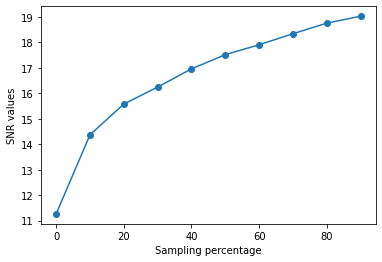

In [20]:
plt.plot(range(0,100,10),snr,"-o")
plt.xlabel("Sampling percentage")
plt.ylabel("SNR values")

In [21]:
from vtk import vtkPoints, vtkCellArray, vtkFloatArray, vtkPolyData, vtkXMLDataSetWriter
import random
from vtk.util import numpy_support

# Constants
NUM_OF_POINTS = 1000

coords = []
for i in range(NUM_OF_POINTS):
	coords.append((int(random.random()*1000), int(random.random()*1000), int(random.random()*1000)))

points = vtkPoints()
pids = [points.InsertNextPoint(x) for x in coords]

vertices = vtkCellArray()
[vertices.InsertNextCell(1, [x]) for x in pids]
point_values = []
for i in range(NUM_OF_POINTS):
	point_values.append(random.random())

point_data = vtkFloatArray()
point_data.SetNumberOfComponents(1)
point_data.SetName("Random Values")
[point_data.InsertNextTuple((x,)) for x in point_values]
poly_data = vtkPolyData()
poly_data.SetPoints(points)
poly_data.SetVerts(vertices)
poly_data.GetPointData().AddArray(point_data)
poly_data.GetPointData().SetActiveScalars(point_data.GetName())
#print(poly_data)
x = np.arange(0.000422732, 0.99881)
y = np.arange(0.000413526, 0.997683)
z = np.arange(0.000125427, 0.9994)
grid_x, grid_y, grid_z = np.meshgrid(x, y, z, indexing='ij')
#griddata(np.array(point_values),np.array(coords),grid_x,grid_y,grid_z)
# print(poly_data)
writer = vtkXMLDataSetWriter()
writer.SetFileName("random_points.vtp")
writer.SetInputData(poly_data)
writer.Write()


1

In [ ]:
#Value based sampling
import vtk
import numpy as np
from scipy.interpolate import griddata
from vtk.util.numpy_support import numpy_to_vtk

# Load VTP file
for i in range(1,6):
    file_path = f"/home/aashi/Desktop/CS677_project/SRS_Small/Isabel_small_srs_0.0{i}.vtp"
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(file_path)
    reader.Update()

    # Get point data from the VTP file
    points = reader.GetOutput().GetPoints()
    coordinates = np.array([points.GetPoint(i) for i in range(points.GetNumberOfPoints())])

    # Get scalar data (pixel values) associated with the points
    scalar_data = reader.GetOutput().GetPointData().GetScalars()

    # Create a regular grid covering the entire volume
    x_grid, y_grid, z_grid = np.meshgrid(np.arange(250), np.arange(250), np.arange(50), indexing='ij')
    #all_coordinates = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))

    # Interpolate pixel values for all coordinates in the volume
    if scalar_data:
        x_known, y_known, z_known = coordinates.T
        known_pixel_values = np.array([scalar_data.GetValue(i) for i in range(scalar_data.GetNumberOfTuples())])

        interpolated_val = griddata((x_known, y_known, z_known), known_pixel_values,(x_grid, y_grid, z_grid), method='linear')
        interpolated_vbs = np.nan_to_num(interpolated_vbs, nan=0.0)  # Replace NaN values with 0.0 or another appropriate value

       # print("Interpolated pixel values for all coordinates:", interpolated_pixel_values)
        # Save the reconstructed volume data to a new VTP file\

        # Save the reconstructed volume data using gridToVTK
        gridToVTK(f"srs_reconstructed_{i}", x_grid, y_grid, z_grid, pointData={"pixel_values": interpolated_val})
        print("Reconstructed volume data saved to 'reconstructed_data.vts'")

    else:
        print("No scalar data found in the VTP file.")


Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'


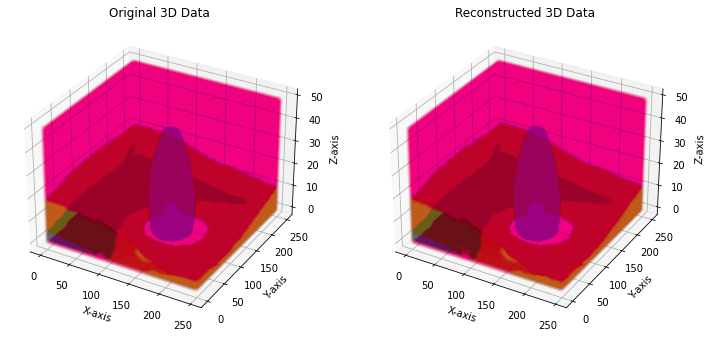

In [66]:
#Gradient-based sampling
import vtk
import numpy as np
from scipy.interpolate import griddata
from vtk.util.numpy_support import numpy_to_vtk

# Load VTP file
file_path = "/home/aashi/Desktop/CS677_project/Isabel_gbs_0.02.vtp"
reader = vtk.vtkXMLPolyDataReader()
reader.SetFileName(file_path)
reader.Update()

# Get point data from the VTP file
points = reader.GetOutput().GetPoints()
coordinates = np.array([points.GetPoint(i) for i in range(points.GetNumberOfPoints())])

# Get scalar data (pixel values) associated with the points
scalar_data = reader.GetOutput().GetPointData().GetScalars()

# Create a regular grid covering the entire volume
x_grid, y_grid, z_grid = np.meshgrid(np.arange(250), np.arange(250), np.arange(50), indexing='ij')
all_coordinates = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))

# Interpolate pixel values for all coordinates in the volume
if scalar_data:
    x_known, y_known, z_known = coordinates.T
    known_pixel_values = np.array([scalar_data.GetValue(i) for i in range(scalar_data.GetNumberOfTuples())])

    interpolated_gbs = griddata((x_known, y_known, z_known), known_pixel_values, all_coordinates, method='nearest')
   # interpolated_gbs= np.nan_to_num(interpolated_gbs, nan=0.0)  # Replace NaN values with 0.0 or another appropriate value

   # print("Interpolated pixel values for all coordinates:", interpolated_pixel_values)
    # Save the reconstructed volume data to a new VTP file\

    # Save the reconstructed volume data using gridToVTK
   # gridToVTK("reconstructed_data", x_grid, y_grid, z_grid, pointData={"pixel_values": interpolated_gbs})
    #print("Reconstructed volume data saved to 'reconstructed_data.vts'")

else:
    print("No scalar data found in the VTP file.")
# Create a 3D figure
fig = plt.figure(figsize=(12, 6))
# # Subplot for original data
ax1 = fig.add_subplot(121, projection='3d')
x, y, z = np.meshgrid(np.arange(original_data.shape[0]), np.arange(original_data.shape[1]), np.arange(original_data.shape[2]), indexing='ij')
ax1.scatter(x, y, z, c=original_data,cmap='Accent',marker='o',alpha=0.01)
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('Original 3D Data')
# Subplot for reconstructed data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x,y,z, c=interpolated_gbs,cmap='Accent',marker='o',alpha=0.01)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')
ax2.set_title('Reconstructed 3D Data')
# Display the plot
plt.show()

In [20]:
# Load VTP file
for i in range(1,6):
    file_path = f'/home/aashi/Desktop/CS677_project/Isabel_small_srs_0.00{i}.vtp'
    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(file_path)
    reader.Update()

    # Get point data from the VTP file
    points = reader.GetOutput().GetPoints()
    coordinates = np.array([points.GetPoint(i) for i in range(points.GetNumberOfPoints())])

    # Get scalar data (pixel values) associated with the points
    scalar_data = reader.GetOutput().GetPointData().GetScalars()

    # Create a regular grid covering the entire volume
    x_grid, y_grid, z_grid = np.meshgrid(np.arange(250), np.arange(250), np.arange(50), indexing='ij')
    #all_coordinates = np.column_stack((x_grid.ravel(), y_grid.ravel(), z_grid.ravel()))

    # Interpolate pixel values for all coordinates in the volume
    if scalar_data:
        x_known, y_known, z_known = coordinates.T
        known_pixel_values = np.array([scalar_data.GetValue(i) for i in range(scalar_data.GetNumberOfTuples())])

        interpolated_val = griddata((x_known, y_known, z_known), known_pixel_values,(x_grid, y_grid, z_grid), method='nearest')
       # interpolated_vbs = np.nan_to_num(interpolated_vbs, nan=0.0)  # Replace NaN values with 0.0 or another appropriate value

       # print("Interpolated pixel values for all coordinates:", )
        # Save the reconstructed volume data to a new VTP file\

        # Save the reconstructed volume data using gridToVTK
         # Save the reconstructed volume data using gridToVTK
        gridToVTK(f"srs_small_reconstructed{i}", x_grid, y_grid, z_grid, pointData={"pixel_values": interpolated_val})
        print("Reconstructed volume data saved to 'reconstructed_data.vts'")

        

Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'
Reconstructed volume data saved to 'reconstructed_data.vts'


In [21]:
#loading reconstructed data
signal_power = np.std(original_data)  # For mean power, you can also use np.max(original_data) for peak power
srs_snr=[]
correlation_coefficient_srs=[]
k=0
for i in range(1,6):
    reader = vtk.vtkXMLStructuredGridReader()
    reader.SetFileName(f'srs_small_reconstructed{i}.vts')
    reader.Update()
    vtk_data = reader.GetOutput()
    points = vtk_to_numpy(vtk_data.GetPoints().GetData())
    reconstructed_data_array = vtk_to_numpy(vtk_data.GetPointData().GetScalars())
    reconstructed_data_array = reconstructed_data_array.reshape(vtk_data.GetDimensions(), order='F')

    # Calculate the mean or peak noise power
    noise = original_data - reconstructed_data_array
    noise_power = np.std(noise)  # For mean power, you can also use np.max(noise ** 2) for peak power

    # Calculate SNR
    srs_snr.append(20*np.log10(signal_power/(noise_power)))
    print(srs_snr)
    #calculate correlation
    
    # Flatten the 3D arrays to 1D arrays
    original_flat = original_data.flatten()
    reconstructed_flat_vbs = reconstructed_data_array.flatten()
    # Calculate the correlation coefficient
    correlation_coefficient_srs.append(np.corrcoef(original_flat,reconstructed_flat_vbs)[0,1])
    
    

[7.4227473063329015]
[7.4227473063329015, 8.423185621234712]
[7.4227473063329015, 8.423185621234712, 8.997247224682706]
[7.4227473063329015, 8.423185621234712, 8.997247224682706, 9.561590102261343]
[7.4227473063329015, 8.423185621234712, 8.997247224682706, 9.561590102261343, 9.674865465981043]


[]

Text(0, 0.5, 'SNR values')

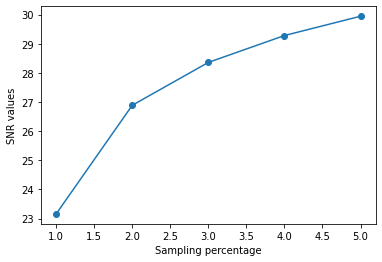

In [8]:
#plotting SNR for VBS
plt.plot(range(1,6),gbs_snr,"-o")
plt.xlabel("Sampling percentage")
plt.ylabel("SNR values")

Text(0, 0.5, 'Correlation-original and reconstructed Data')

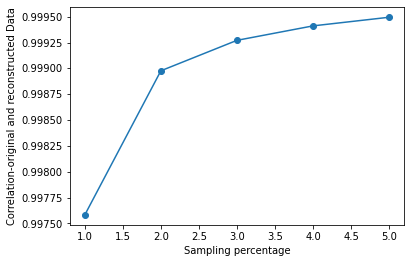

In [11]:
# plotting correlation
plt.plot(range(1,6),correlation_coefficient_gbs,"-o")
plt.xlabel("Sampling percentage")
plt.ylabel("Correlation-original and reconstructed Data")

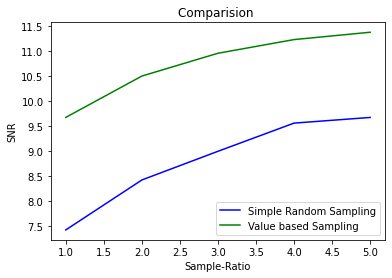

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for three different methods
num_points = 50
# Create a line plot with different colors for each method
plt.plot(range(1,6),srs_snr,color='blue', label='Simple Random Sampling')
plt.plot(range(1,6), vbs_snr, color='green', label='Value based Sampling')

# Add labels and legend
plt.xlabel('Sample-Ratio')
plt.ylabel('SNR')
plt.title('Comparision ')
plt.legend()

# Show the plot
plt.show()



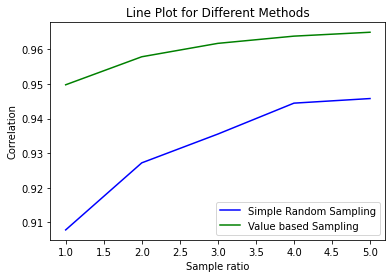

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data for three different methods
num_points = 50
# Create a line plot with different colors for each method
plt.plot(range(1,6),correlation_coefficient_srs,color='blue', label='Simple Random Sampling')
plt.plot(range(1,6), correlation_coefficient_vbs, color='green', label='Value based Sampling')

# Add labels and legend
plt.xlabel('Sample ratio')
plt.ylabel('Correlation')
plt.title('Line Plot for Different Methods')
plt.legend()

# Show the plot
plt.show()



In [ ]:

# Flatten the 3D arrays to 1D arrays
original_flat = original_data.flatten()
reconstructed_flat_gbs = interpolated_gbs.flatten()
reconstructed_flat_vbs = interpolated_vbs.flatten()
# Calculate the correlation coefficient
correlation_coefficient_gbs = np.corrcoef(original_flat, reconstructed_flat_gbs)[0, 1]
correlation_coefficient_vbs = np.corrcoef(original_flat,reconstructed_flat_vbs)[0,1]
print(f"Correlation Coefficient for gradient based sampling: {correlation_coefficient_gbs}")
print(f"Correlation Coefficient for value based sampling: {correlation_coefficient_vbs}")
